<h1>Let us start the project with importing necessary libraries<h1>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

<h1>Let us explore the Dataset<h1>

In [2]:
dt=pd.read_csv("diamond.csv")
dt

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [3]:
dt.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [4]:
dt.tail()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [5]:
dt.shape

(53940, 11)

In [6]:
dt.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
dt.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [8]:
dt.max()

Unnamed: 0        53940
carat              5.01
cut           Very Good
color                 J
clarity            VVS2
depth              79.0
table              95.0
price             18823
x                 10.74
y                  58.9
z                  31.8
dtype: object

In [9]:
dt['carat'].max()

5.01

In [10]:
dt.depth.max()

79.0

In [11]:
dt['price'].argmax()

27749

In [12]:
dt['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [13]:
dt.iloc[[dt['price'].argmax()]]

Unnamed: 0  carat      cut color clarity  depth  table  price    x  \
27749       27750   2.29  Premium     I     VS2   60.8   60.0  18823  8.5   

          y     z  
27749  8.47  5.16

In [14]:
dt.iloc[[dt['price'].argmax()]]['depth']

27749    60.8
Name: depth, dtype: float64

In [15]:
type(dt.iloc[[dt['price'].argmax()]]['depth'])

pandas.core.series.Series

In [16]:
type(dt.iloc[[dt['price'].argmax()]])

pandas.core.frame.DataFrame

In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<h1>Finding and Filling Null Values<h1>

In [18]:
dt.isnull()

Unnamed: 0  carat    cut  color  clarity  depth  table  price      x  \
0           False  False  False  False    False  False  False  False  False   
1           False  False  False  False    False  False  False  False  False   
2           False  False  False  False    False  False  False  False  False   
3           False  False  False  False    False  False  False  False  False   
4           False  False  False  False    False  False  False  False  False   
...           ...    ...    ...    ...      ...    ...    ...    ...    ...   
53935       False  False  False  False    False  False  False  False  False   
53936       False  False  False  False    False  False  False  False  False   
53937       False  False  False  False    False  False  False  False  False   
53938       False  False  False  False    False  False  False  False  False   
53939       False  False  False  False    False  False  False  False  False   

           y      z  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
53935  False  False  
53936  False  False  
53937  False  False  
53938  False  False  
53939  False  False  

[53940 rows x 11 columns]

In [19]:
dt.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [20]:
dt.notnull()

Unnamed: 0  carat   cut  color  clarity  depth  table  price     x  \
0            True   True  True   True     True   True   True   True  True   
1            True   True  True   True     True   True   True   True  True   
2            True   True  True   True     True   True   True   True  True   
3            True   True  True   True     True   True   True   True  True   
4            True   True  True   True     True   True   True   True  True   
...           ...    ...   ...    ...      ...    ...    ...    ...   ...   
53935        True   True  True   True     True   True   True   True  True   
53936        True   True  True   True     True   True   True   True  True   
53937        True   True  True   True     True   True   True   True  True   
53938        True   True  True   True     True   True   True   True  True   
53939        True   True  True   True     True   True   True   True  True   

          y     z  
0      True  True  
1      True  True  
2      True  True  
3      True  True  
4      True  True  
...     ...   ...  
53935  True  True  
53936  True  True  
53937  True  True  
53938  True  True  
53939  True  True  

[53940 rows x 11 columns]

<h1>Data Visualisation<h1>

<h2>1.Simple Plot<h2>

<Axes: >

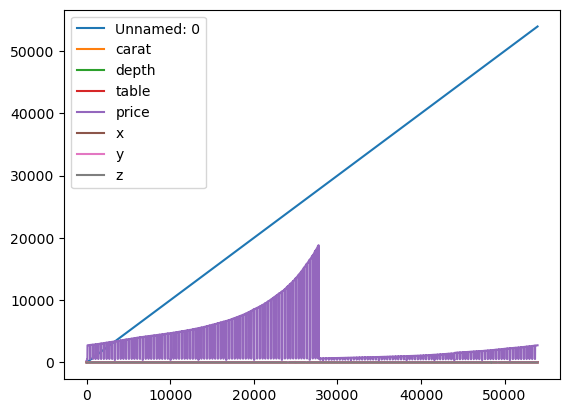

In [21]:
dt.plot()
#plt.savefig("Plot.png")

<h2>2.Scatter Plot<h2>

Text(0.5, 1.0, 'Demonstrating the realtionship of Price vs Depth using Scatter Plot')

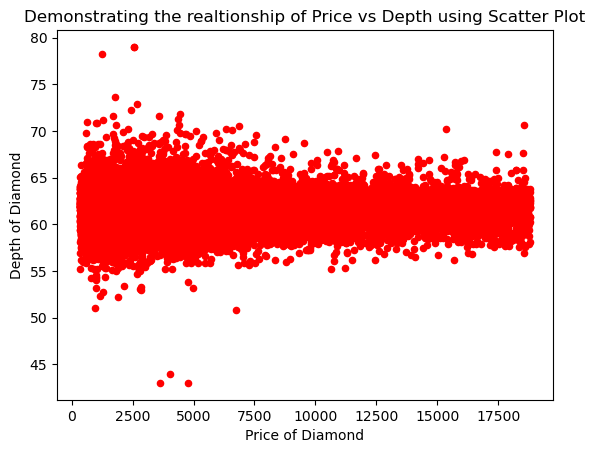

In [22]:
dt.plot(kind='scatter',x='price',y='depth',color="r")
plt.xlabel("Price of Diamond")
plt.ylabel("Depth of Diamond")
plt.title("Demonstrating the realtionship of Price vs Depth using Scatter Plot")
# plt.savefig("Scatter.png")

<h2>3.Hist Plot or Histogram<h2>

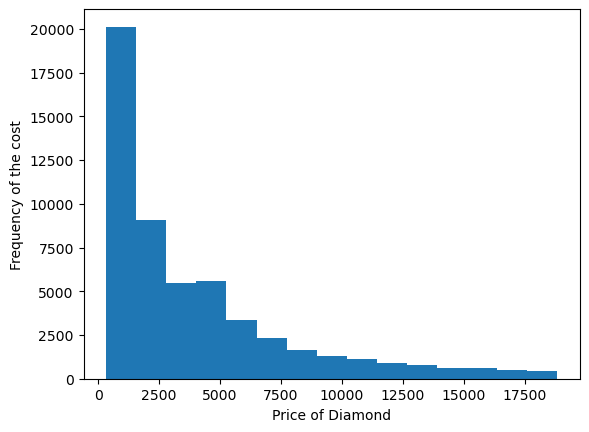

In [23]:
dt['price'].plot(kind='hist',bins=15)
plt.xlabel("Price of Diamond")
plt.ylabel("Frequency of the cost")
plt.show()

<h2>4.Scatter Plot<h2>

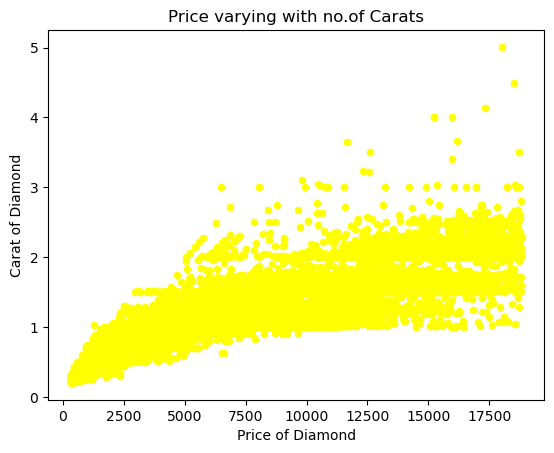

<Figure size 640x480 with 0 Axes>

In [24]:
dt.plot(kind='scatter',x='price',y='carat',color='yellow')
plt.xlabel("Price of Diamond")
plt.ylabel("Carat of Diamond")
plt.title("Price varying with no.of Carats")
plt.show()
plt.savefig("ScatterPlot_Yellow.png")

<h2>5.Pie Plot<h2>

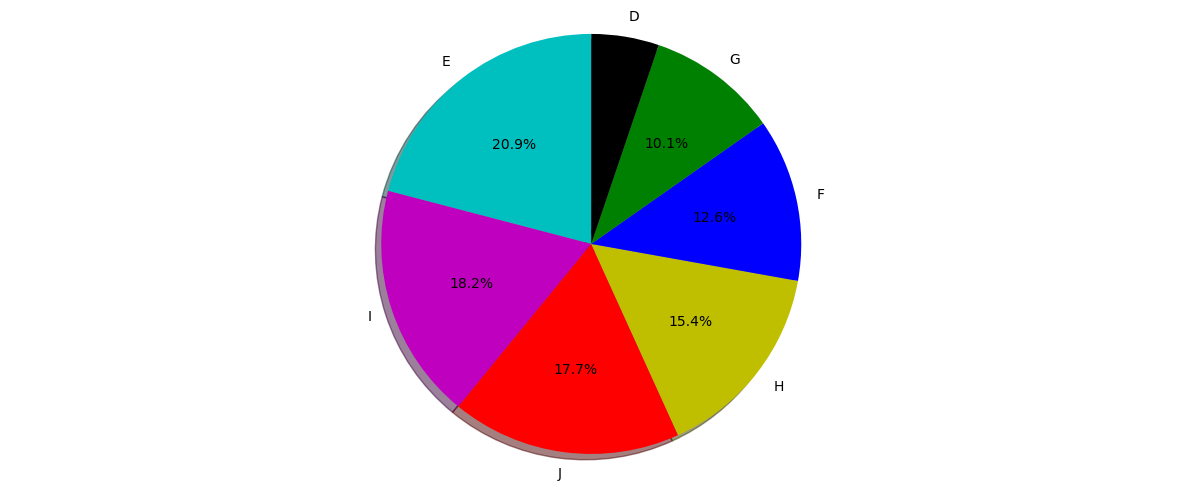

In [25]:
data_info = dt.value_counts('color')
l = dt['color'].unique()
c = ['c', 'm', 'r', 'y', 'b', 'g', 'k']
plt.figure(figsize=(15, 6))
plt.pie(data_info, colors=c, labels=l, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis("equal")
plt.show()
# plt.savefig("Pie_Plot.png")

<h2>6.Box Plot<h2>

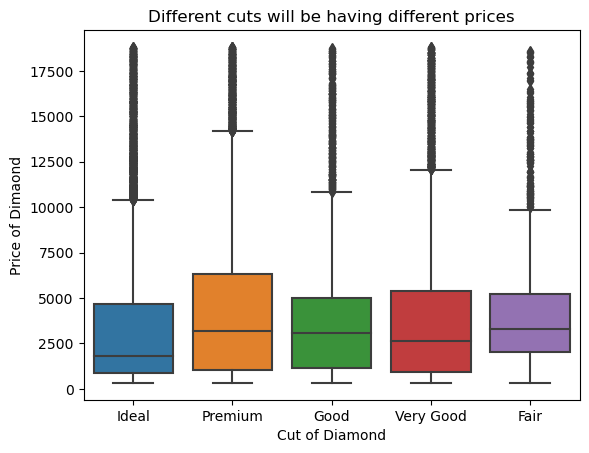

In [26]:
sns.boxplot(x=dt['cut'],y=dt['price'])
plt.xlabel("Cut of Diamond")
plt.ylabel("Price of Dimaond")
plt.title("Different cuts will be having different prices")
plt.show()

<h2>7.Count Plot<h2>

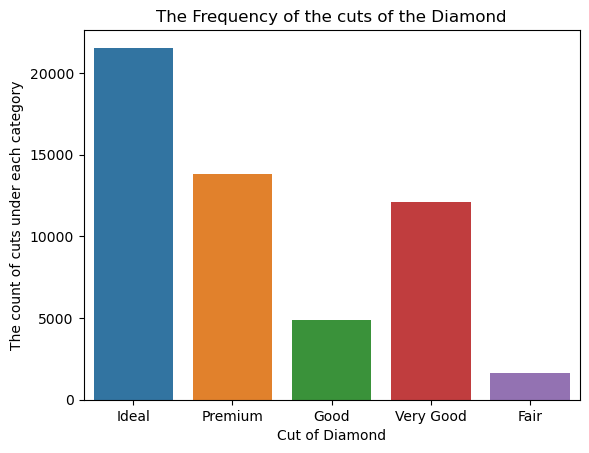

In [27]:
sns.countplot(x='cut',data=dt)
plt.title("The Frequency of the cuts of the Diamond")
plt.xlabel("Cut of Diamond")
plt.ylabel("The count of cuts under each category")
plt.show()

<h2>8.Bar Plot<h2>

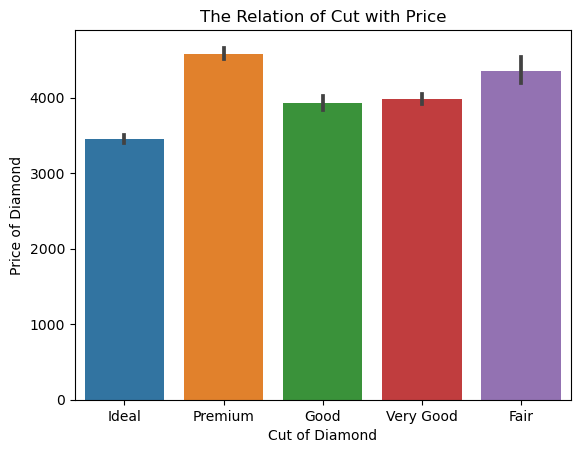

In [28]:
sns.barplot(data=dt,x='cut',y='price')
plt.xlabel('Cut of Diamond')
plt.ylabel('Price of Diamond')
plt.title('The Relation of Cut with Price')
plt.show()

<h2>9.Regression Plot<h2>

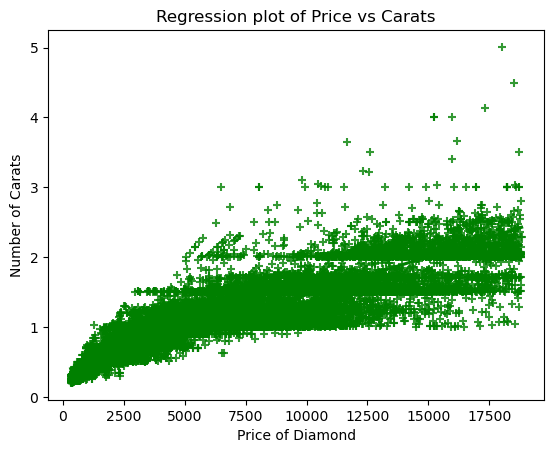

In [29]:
ax = sns.regplot(x='price', y='carat', data=dt, color='green', marker='+')
plt.xlabel("Price of Diamond")
plt.ylabel("Number of Carats")
plt.title("Regression plot of Price vs Carats")
plt.show()

<h1>Model Building<h1>

<h2>Convert the Categorical data into numerical data<h2>

In [30]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [33]:
cl = (dt.dtypes =="object")
obj_col = list(cl[cl].index)
print(obj_col)

['cut', 'color', 'clarity']


In [34]:
le = LabelEncoder()
for col in obj_col:
    dt[col] = le.fit_transform(dt[col])
dt.head()

Unnamed: 0  carat  cut  color  clarity  depth  table  price     x     y  \
0           1   0.23    2      1        3   61.5   55.0    326  3.95  3.98   
1           2   0.21    3      1        2   59.8   61.0    326  3.89  3.84   
2           3   0.23    1      1        4   56.9   65.0    327  4.05  4.07   
3           4   0.29    3      5        5   62.4   58.0    334  4.20  4.23   
4           5   0.31    1      6        3   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [35]:
dt.head()

Unnamed: 0  carat  cut  color  clarity  depth  table  price     x     y  \
0           1   0.23    2      1        3   61.5   55.0    326  3.95  3.98   
1           2   0.21    3      1        2   59.8   61.0    326  3.89  3.84   
2           3   0.23    1      1        4   56.9   65.0    327  4.05  4.07   
3           4   0.29    3      5        5   62.4   58.0    334  4.20  4.23   
4           5   0.31    1      6        3   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

<h2>Splitting the data into Train and Test Data<h2>

In [36]:
x=dt.drop('price',axis =1)
y=dt['price']
print(x.shape)
print(y.shape)

(53940, 10)
(53940,)


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_train.shape

(43152, 10)

<h2>Finding Best Model<h2>

In [39]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [44]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'XGBRegressor': XGBRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

In [45]:
result={}
lr = LinearRegression()
lr.fit(x_train_sc, y_train)
y_pred_lr = lr.predict(x_test_sc)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
result["LinearRegrssion"]=rmse_lr

In [46]:
Rf = RandomForestRegressor(n_estimators=100, random_state=42)
Rf.fit(x_train_sc, y_train)
y_pred_Rf = Rf.predict(x_test_sc)
mse_Rf = mean_squared_error(y_test, y_pred_Rf)
rmse_Rf = np.sqrt(mse_Rf)
result["RandomForestRegressor"]=rmse_Rf

In [47]:
Dt = DecisionTreeRegressor()
Dt.fit(x_train_sc, y_train)
y_pred_Dt = Dt.predict(x_test_sc)
mse_Dt = mean_squared_error(y_test, y_pred_Dt)
rmse_Dt = np.sqrt(mse_Dt)
result["DecisionTreeRegressor"]=rmse_Dt

In [48]:
Xgb = XGBRegressor()
Xgb.fit(x_train_sc, y_train)
y_pred_Xgb = Xgb.predict(x_test_sc)
mse_Xgb = mean_squared_error(y_test, y_pred_Xgb)
rmse_Xgb = np.sqrt(mse_Xgb)
result["XGBRegressor"]=rmse_Xgb

In [49]:
Knn = KNeighborsRegressor()
Knn.fit(x_train_sc, y_train)
y_pred_Knn = Knn.predict(x_test_sc)
mse_Knn = mean_squared_error(y_test, y_pred_Knn)
rmse_Knn = np.sqrt(mse_Knn)
result["KNeighborsRegressor"]=rmse_Knn

In [50]:
result

{'LinearRegrssion': 1346.1144269890715,
 'RandomForestRegressor': 21.206443861991186,
 'DecisionTreeRegressor': 23.455406612754977,
 'XGBRegressor': 55.40791926674163,
 'KNeighborsRegressor': 664.8936810223148}

<h2>The RMSE above states that RandomForestRegressor is the best model for our data set</h2>

In [52]:
Rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [55]:
Rf.fit(x_train_sc, y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_pred_Rf = Rf.predict(x_test_sc)
print(y_pred_Rf)

[ 554.34 2200.42 1238.01 ...  761.08 9836.37 3741.95]


In [60]:
mse_Rf = mean_squared_error(y_test, y_pred_Rf)
rmse_Rf = np.sqrt(mse_Rf)
rmse_Rf

21.206443861991186

<h1>Conclusion</h1>

<h4><i>Diamond price prediction using machine learning algorithms is a complex task that involves analysing various factors that affect the value of diamonds, such as carat weight, colour, clarity, cut, and other market trends. Machine learning algorithms are a promising approach to predict diamond prices as they can identify patterns and relationships between the various factors that affect the value of diamonds. The prediction of diamond prices using machine learning algorithms can be achieved through supervised learning techniques such as regression, decision trees, and neural networks. These algorithms can use historical data to predict the future prices of diamonds with high accuracy, enabling buyers and sellers to make informed decisions. In conclusion, diamond price prediction using machine learning algorithms is an exciting field that has great potential in the diamond industry. The ability to predict the value of diamonds accurately can lead to better decision-making, reduced risks, and increased profits for buyers and sellers alike.</i></h4>